In [23]:
import pandas as pd
import numpy as np
import tensorflow
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [24]:
from turtle import resizemode
from xmlrpc.client import ResponseError
import requests
start=input()
end=input()
s=input()
stocks=input()

url='https://api.polygon.io/v2/aggs/ticker/'+stocks+'/range/1/day/'+start+'/'+end+'?adjusted=true&sort=asc&limit=120&apiKey=GDEJQ4fBwwBsjfzoj_YhExmTC2h170rr'
response = requests.request("GET", url).json()

df=pd.DataFrame(response['results'])

In [25]:
# df=web.DataReader('AAPL', data_source='yahoo',start='2012-01-03',end='2019-12-17')


In [26]:
data=df[s]
cdf=data.values
eig=math.ceil(len(cdf)*0.8)
cdf=cdf.reshape(-1,1)


In [27]:
scaler=MinMaxScaler(feature_range=(0,1))
cdf=scaler.fit_transform(cdf)
train_data=cdf[0:eig,:]

In [28]:
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
x_train, y_train=np.array(x_train), np.array(y_train)    

In [29]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(36, 60, 1)

In [30]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False ))
model.add(Dense(25))
model.add(Dense(1))


In [31]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
model.fit(x_train,y_train , batch_size=1, epochs=1)

36/36 [==============================] - 9s 35ms/step - loss: 0.0475


In [33]:
test_data=cdf[eig-60:,:]
x_test=[]
y_test=cdf[eig:,:]
for i in range (60 ,len(test_data)):
    x_test.append(test_data[i-60:i,0])


In [34]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
y_test=np.array(y_test)

In [35]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
y_test=scaler.inverse_transform(y_test)

In [36]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

4.624320882161458

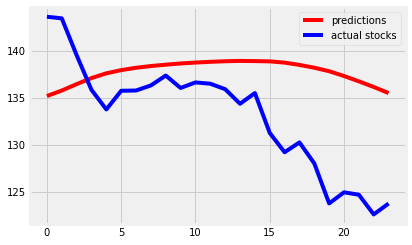

In [37]:
# plt.plot(predictions,color='red',label='predictions')
# plt.plot(y_test,color='blue',label='actual stocks')
# plt.legend()
